In [44]:
pip install scikit-learn


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [ ]:
conda update -n base -c defaults conda


Retrieving notices: ...working... done
Solving environment: done

## Package Plan ##

  environment location: /Users/richard/opt/anaconda3

  added / updated specs:
    - conda


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    anaconda-anon-usage-0.4.2  |   py39hfb7c958_0          25 KB
    aom-3.6.0                  |       hcec6c5f_0         3.0 MB
    dav1d-1.2.1                |       h6c40b1e_0         732 KB
    imagecodecs-2023.1.23      |   py39hd1bf5dc_0         9.0 MB
    jellyfish-1.0.1            |   py39haa3eb71_0         311 KB
    libavif-0.11.1             |       h6c40b1e_0          93 KB
    libwebp-1.3.2              |       hf6ce154_0          84 KB
    libwebp-base-1.3.2         |       h6c40b1e_0         371 KB
    lxml-4.9.3                 |   py39h946e0e5_0         1.3 MB
    mypy_extensions-1.0.0      |   py39hecd8cb5_0          13 KB
    openssl-3.0.11         

In [ ]:
conda update scikit-learn

In [1]:
# from sklearn.module import Model
# model = Model()
# model.fit(X , y)
# predictions = model.predict(X_new)
# print(predictions)

In [2]:
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
#from sklearn.module import Model

In [3]:

churn_df = pd.read_csv("churn_df.csv", index_col = 0)
X = churn_df[["total_day_charge" , "total_eve_charge"]].values
y = churn_df["churn"].values
print(X.shape , y.shape)

(3333, 2) (3333,)


In [4]:
knn = KNeighborsClassifier(n_neighbors = 15)
knn.fit(X , y)

KNeighborsClassifier(n_neighbors=15)

In [5]:
X_new = np.array([[56.8 , 17.5] , [24.4 , 24.1] , [50.1 , 10.9]])

print(X_new.shape)

(3, 2)


In [6]:
predictions = knn.predict(X_new)
print('Predictions: {}'.format(predictions))

Predictions: [1 0 0]


In [7]:
X = churn_df[["account_length" , "customer_service_calls"]].values
y = churn_df["churn"].values
print(X.shape , y.shape)
knn = KNeighborsClassifier(n_neighbors = 6)
knn.fit(X , y)
X_new = np.array([[30.0, 17.5], [107.0, 24.1],[213.0, 10.9]])

print(X_new.shape)
predictions = knn.predict(X_new)
print('Predictions: {}'.format(predictions))

(3333, 2) (3333,)
(3, 2)
Predictions: [0 1 0]


In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=21,stratify=y) 
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train,y_train) 
print(knn.score(X_test, y_test))

0.858


[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25]


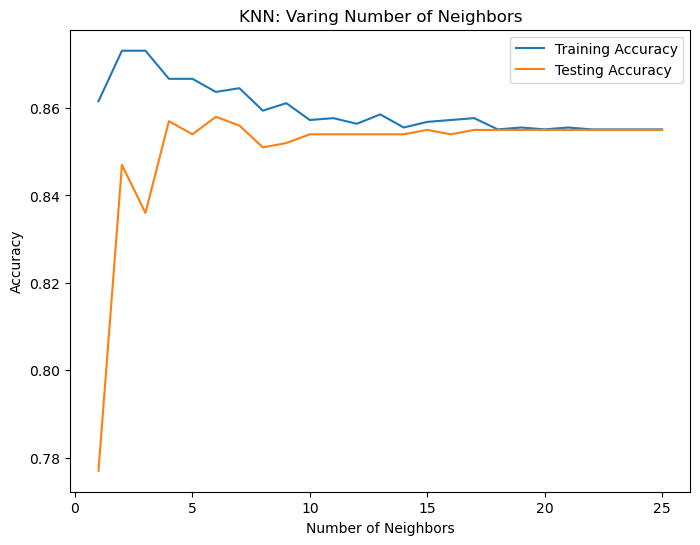

In [9]:
train_accuracies = {} 
test_accuracies = {} 
neighbors = np.arange(1,26) 
print(neighbors)
for neighbor in neighbors:
    knn = KNeighborsClassifier(n_neighbors=neighbor) 
    knn.fit(X_train,y_train)
    train_accuracies[neighbor] = knn.score(X_train, y_train) 
    test_accuracies[neighbor] = knn.score(X_test, y_test)
#print(train_accuracies.values()) print(test_accuracies.values())
my_train = list(train_accuracies.values()) 
my_test = list(test_accuracies.values())
plt.figure(figsize=(8,6))
plt.title('KNN: Varing Number of Neighbors') 
plt.plot(neighbors, my_train, label='Training Accuracy') 
plt.plot(neighbors, my_test, label='Testing Accuracy') 
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [10]:
# Create Numpy arrays for features (X) and target variable (y)
X = churn_df.drop("churn", axis=1).values
y = churn_df["churn"].values

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

# Initialize and fit the KNN classifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# Compute and print the model's accuracy on the test data
accuracy = knn.score(X_test, y_test)
print("Accuracy of the KNN classifier on test data: {:.2f}%".format(accuracy * 100))

Accuracy of the KNN classifier on test data: 87.41%


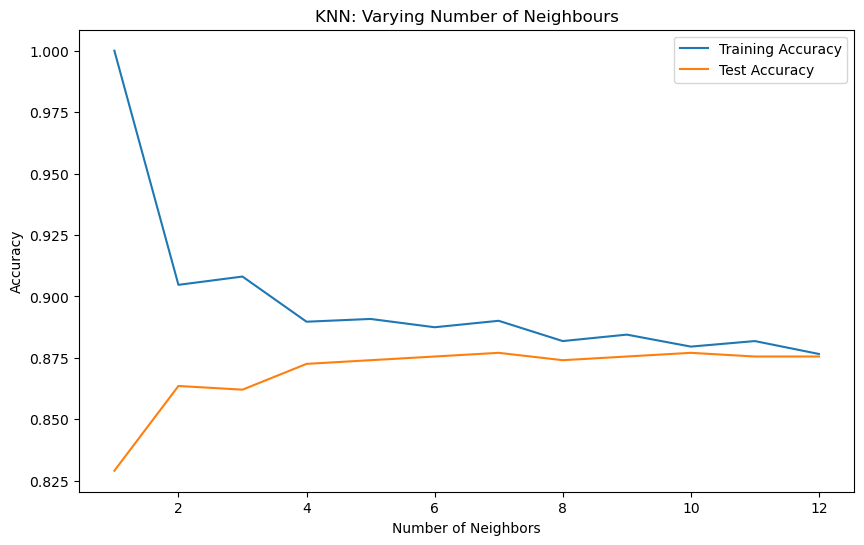

In [11]:
# Create an array of values from 1 to 12 for the number of neighbors
neighbors = np.arange(1, 13)

# Create empty dictionaries to store the accuracy scores
train_accuracies = {}
test_accuracies = {}

# Iterate through different values of neighbors
for n in neighbors:
    # Instantiate a KNN classifier with n_neighbors=n
    knn = KNeighborsClassifier(n_neighbors=n)
    
    # Fit the model to the training data
    knn.fit(X_train, y_train)
    
    # Calculate accuracy scores for training and test sets
    train_accuracy = knn.score(X_train, y_train)
    test_accuracy = knn.score(X_test, y_test)
    
    # Store the accuracy scores in dictionaries
    train_accuracies[n] = train_accuracy
    test_accuracies[n] = test_accuracy

# Plot the accuracy scores for training and test sets
plt.figure(figsize=(10, 6))
plt.plot(neighbors, list(train_accuracies.values()), label='Training Accuracy')
plt.plot(neighbors, list(test_accuracies.values()), label='Test Accuracy')
plt.title('KNN: Varying Number of Neighbours')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [12]:
print(neighbors)
print(train_accuracies)
print(test_accuracies)

[ 1  2  3  4  5  6  7  8  9 10 11 12]
{1: 1.0, 2: 0.9047261815453863, 3: 0.9081020255063766, 4: 0.8897224306076519, 5: 0.890847711927982, 6: 0.8874718679669917, 7: 0.8900975243810952, 8: 0.8818454613653414, 9: 0.8844711177794449, 10: 0.8795948987246812, 11: 0.8818454613653414, 12: 0.8765941485371342}
{1: 0.8290854572713643, 2: 0.863568215892054, 3: 0.8620689655172413, 4: 0.8725637181409296, 5: 0.8740629685157422, 6: 0.8755622188905547, 7: 0.8770614692653673, 8: 0.8740629685157422, 9: 0.8755622188905547, 10: 0.8770614692653673, 11: 0.8755622188905547, 12: 0.8755622188905547}


# REGRESSION WITH SCIKIT LEARN

In [13]:
diabetes_df = pd.read_csv("diabetes.csv")
print(diabetes_df.head())

   Unnamed: 0  pregnancies  glucose  triceps  insulin   bmi  age  diabetes
0           0            6      148       35        0  33.6   50         1
1           1            1       85       29        0  26.6   31         0
2           2            8      183        0        0  23.3   32         1
3           3            1       89       23       94  28.1   21         0
4           4            0      137       35      168  43.1   33         1


In [14]:
diabetes_df = pd.read_csv('diabetes.csv', index_col = 0) 
print(diabetes_df.shape)
#subset row for bmi not equal to 0 
diabetes_df = diabetes_df[diabetes_df['bmi'] != 0]
print(diabetes_df.shape)
#subset for glucose not equal to 0 
diabetes_df = diabetes_df[diabetes_df['glucose'] != 0]
print(diabetes_df.shape)
diabetes_df.head()


(768, 7)
(757, 7)
(752, 7)


,pregnancies,glucose,triceps,insulin,bmi,age,diabetes
0,6,148,35,0,33.6,50,1
1,1,85,29,0,26.6,31,0
2,8,183,0,0,23.3,32,1
3,1,89,23,94,28.1,21,0
4,0,137,35,168,43.1,33,1


In [15]:
X = diabetes_df.drop("glucose", axis = 1).values
y = diabetes_df["glucose"].values
print(type(X) , type(y))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [16]:
X_bmi = X[: , 3]
print(y.shape , X_bmi.shape)


(752,) (752,)


In [17]:
X_bmi = X_bmi.reshape(-1 , 1)
print(X_bmi.shape)

(752, 1)


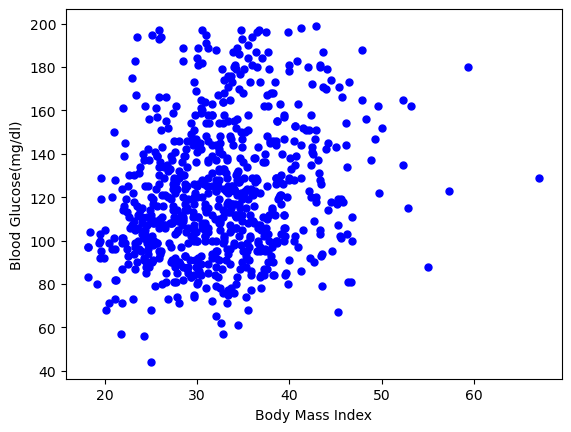

In [18]:
plt.scatter(X_bmi, y , s = 25 , color = "blue")
plt.ylabel("Blood Glucose(mg/dl)")
plt.xlabel("Body Mass Index")
# plt.grid(True)
plt.show()

(768, 7)


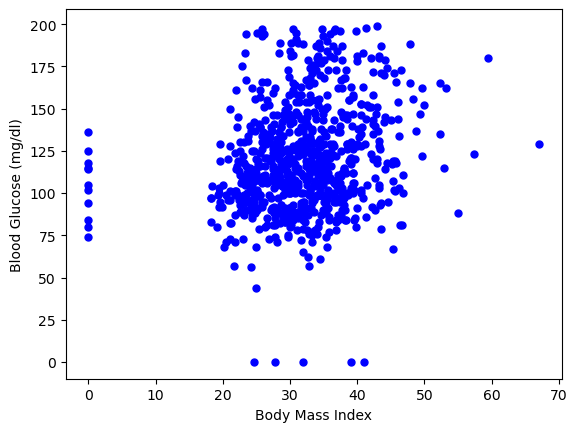

In [19]:
diabetes_df = pd.read_csv('diabetes.csv', index_col = 0)

print(diabetes_df.shape)

X = diabetes_df.drop('glucose', axis=1).values

y = diabetes_df['glucose'].values

X_bmi = X[:,3]

X_bmi = X_bmi.reshape(-1,1)

plt.scatter(X_bmi, y, s = 25, color = 'blue')

plt.ylabel('Blood Glucose (mg/dl)')

plt.xlabel('Body Mass Index')

#plt.grid(True)

plt.show()

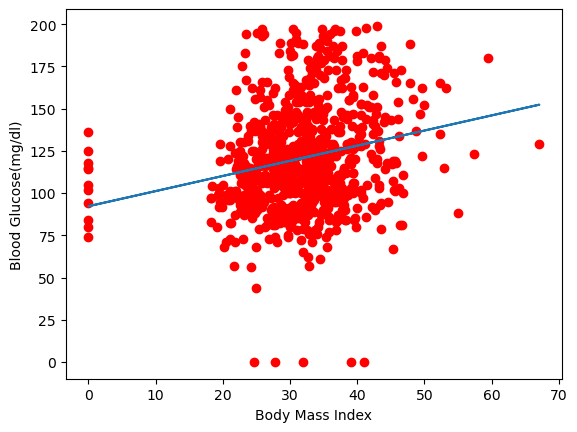

In [20]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_bmi, y)
predictions = reg.predict(X_bmi)
plt.scatter(X_bmi, y , color = "red")
plt.plot(X_bmi , predictions)
plt.ylabel("Blood Glucose(mg/dl)")
plt.xlabel("Body Mass Index")
# plt.grid(True)
plt.show()

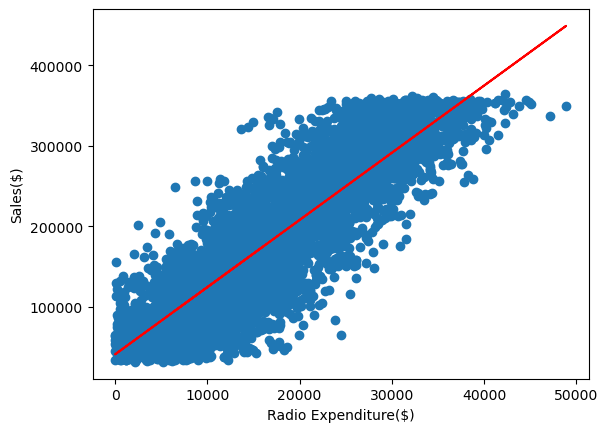

In [21]:

sales_df = pd.read_csv('sales_df.csv', index_col=0)

X = sales_df[['radio']].values
y = sales_df['sales'].values

reg.fit(X, y)

predictions = reg.predict(X)
plt.scatter(X, y)
plt.plot(X, predictions,color = "red")
plt.ylabel("Sales($)")
plt.xlabel("Radio Expenditure($)")
plt.show()


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X_train, X_test ,y_train, y_test = train_test_split(X , y , test_size = 0.3, random_state = 42)
reg_all = LinearRegression()
reg_all.fit(X_train, y_train)
y_pred = reg_all.predict(X_test)

In [23]:
reg_all.score(X_test, y_test)


0.7609020445216754

In [24]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred, squared = False)

45879.42086239429

In [25]:
from sklearn.metrics import r2_score, mean_squared_error

sales_df = pd.read_csv('sales_df.csv')

X = sales_df.drop('sales', axis=1) .values
y = sales_df['sales'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

reg = LinearRegression()

reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)

print("Prediction: ", y_pred[:2])
print("Actual Values: ", y_test[:2])
r_squared = reg.score(X_test , y_test)
#rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("R^2: {}".format(r_squared))
print("RMSE: {}".format(rmse))
# r_squared = r2_score(y_test, y_pred)

# rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# print("R^2", r_squared)
# print("RMSE:", rmse)

Prediction:  [53099.56399301 71056.14674591]
Actual Values:  [55261.28 67574.9 ]
R^2: 0.9990147957135925
RMSE: 2945.05318561073


In [26]:

from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression

# Assuming you have already loaded your dataset into a DataFrame called sales_df

# Create X and y
X = sales_df[['radio', 'social_media']]
y = sales_df['sales']

# Create KFold object
kf = KFold(n_splits=6, shuffle=True, random_state=5)

# Create a linear regression model
reg = LinearRegression()

# Perform cross-validation and get the scores
cv_scores = cross_val_score(reg, X, y, cv=kf)

# Print the individual scores for each fold
print("CV scores:")
print(cv_scores)

# Calculate and print the mean of the cv_scores results
mean_score = np.mean(cv_scores)
print(f"Mean: {mean_score}")

# Calculate and print the standard deviation of cv_scores
std_deviation = np.std(cv_scores)
print(f"STD: {std_deviation}")

# Display the 95% confidence interval for your results using np.quantile()
lower_quantile = np.quantile(cv_scores, 0.025)
upper_quantile = np.quantile(cv_scores, 0.975)
print(f"Confidence Interval: [{lower_quantile}, {upper_quantile}]")


CV scores:
[0.74451678 0.77241887 0.76842114 0.7410406  0.75170022 0.74406484]
Mean: 0.7536937414361207
STD: 0.012305389070474678
Confidence Interval: [0.7414186258008111, 0.7719191575451564]


In [27]:
from sklearn.linear_model import Lasso
diabetes_df = pd.read_csv('diabetes.csv', index_col = 0) 
diabetes_df = diabetes_df[diabetes_df['bmi'] != 0] 
diabetes_df = diabetes_df[diabetes_df['glucose'] != 0] 
X = diabetes_df.drop('glucose', axis=1).values
y = diabetes_df['glucose'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 
scores = []
for alpha in [0.01,1.0,10.0, 20.0, 50.0]:
    lasso = Lasso(alpha=alpha) 
    lasso.fit(X_train, y_train)
    lasso_pred = lasso.predict(X_test) 
    scores.append(lasso.score(X_test, y_test))
print(scores)

[0.3562250067582078, 0.34618285370900226, 0.2014482392741529, 0.18595115472492296, 0.14542319216659472]


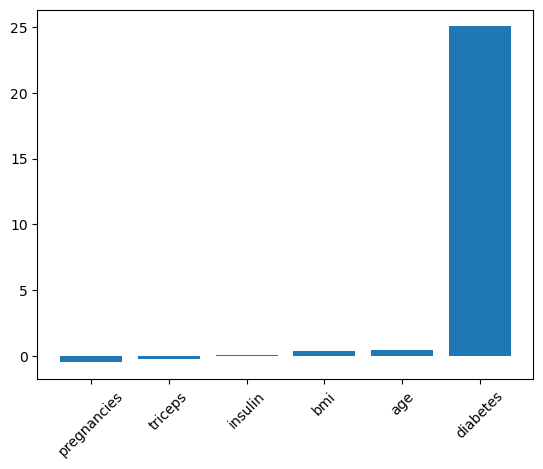

In [28]:
diabetes_df = pd.read_csv('diabetes.csv', index_col = 0) 
diabetes_df = diabetes_df[diabetes_df['bmi'] != 0] 
diabetes_df = diabetes_df[diabetes_df['glucose'] != 0] 
X = diabetes_df.drop('glucose', axis=1).values
y = diabetes_df['glucose'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
names = diabetes_df.drop('glucose', axis=1).columns 
lasso = Lasso(alpha=0.1)
lasso_coef = lasso.fit(X,y).coef_
plt.bar(names, lasso_coef)
plt.xticks(rotation=45) 
plt.show()

Lasso coefficients:
[ 3.56256962 -0.00397035  0.00496385]


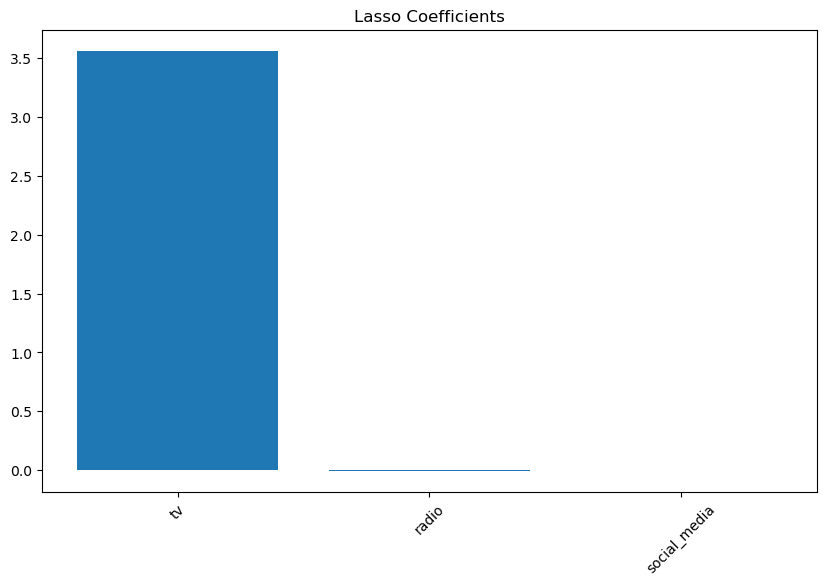

In [29]:
# Create X and y
sales_df = pd.read_csv("sales_df.csv",  index_col = 0)
X = sales_df.drop('sales', axis=1)  # Feature variables
y = sales_df['sales']  # Target variable

# Get the feature names
sales_columns = X.columns

# Instantiate a Lasso regressor with an alpha of 0.3
lasso = Lasso(alpha=0.3)

# Fit the model to the data
lasso.fit(X, y)

# Compute the model's coefficients and store them in lasso_coef
lasso_coef = lasso.coef_

# Print the coefficients (optional)
print("Lasso coefficients:")
# for feature, coef in zip(sales_columns, lasso_coef):
#     print(f"{feature}: {coef:.4f}")
print(lasso_coef)

# You can also plot the coefficients if desired
plt.figure(figsize=(10, 6))
plt.bar(sales_columns, lasso_coef)
plt.xticks(rotation=45)
plt.title("Lasso Coefficients")
plt.show()

In [31]:
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
import numpy as np
music_df = pd.read_csv('music_unclean.csv', index_col = 0)
print(music_df.columns)
print(music_df.isna().sum().sort_values())
music_df = music_df.dropna(subset=['genre','popularity','loudness','liveness','tempo'])
music_df['genre'] = np.where(music_df['genre'] == 'Rock', 1,0)
print(music_df.isna().sum().sort_values())

 

X_cat = music_df['genre'].values.reshape(-1,1)
X_num = music_df.drop(['genre','popularity'], axis=1).values
y = music_df['popularity'].values

 

X_train_cat, X_test_cat, y_train, y_test = train_test_split(X_cat, y, test_size=0.3,
                                                            random_state = 12)
X_train_num, X_test_num, y_train, y_test = train_test_split(X_num, y, test_size=0.3,
                                                            random_state = 12)

 

imp_cat = SimpleImputer(strategy='most_frequent')
X_train_cat = imp_cat.fit_transform(X_train_cat)
X_test_cat = imp_cat.transform(X_test_cat)

 

imp_num = SimpleImputer()
X_train_num = imp_num.fit_transform(X_train_num)
X_test_num = imp_num.transform(X_test_num)

 

X_train = np.append(X_train_num, X_train_cat, axis=1)
X_test = np.append(X_test_num, X_test_cat, axis=1)

 

columns = ['acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo',
       'valence', 'genre']
check = pd.DataFrame(X_train, columns = columns)
print(check.isna().sum().sort_values())

 

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(knn.score(X_test, y_test))

Index(['popularity', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo',
       'valence', 'genre'],
      dtype='object')
genre                 8
popularity           31
loudness             44
liveness             46
tempo                46
speechiness          59
duration_ms          91
instrumentalness     91
danceability        143
valence             143
acousticness        200
energy              200
dtype: int64
popularity            0
liveness              0
loudness              0
tempo                 0
genre                 0
duration_ms          29
instrumentalness     29
speechiness          53
danceability        127
valence             127
acousticness        178
energy              178
dtype: int64
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo              